In [70]:
import numpy as np
from collections import Counter

In [71]:
d = np.load("nd.npy")

In [72]:
def get_label(data=d):
    label = []
    for line in data:
        temp = np.round(list(line[0]), 1)
        temp = "_".join([str(i) for i in temp])
        label.append(temp)

    classes = [i for i in Counter(label).keys()]
    print(classes)
    max_class = len(Counter(label))
    
    pred = []
    for line in label:
        for j in range(max_class):
            if line == classes[j]:
                pred.append(j)
    return label, pred
lable, pred = get_label(d)

['5.8_3.1_3.7_1.2', '5.9_3.1_3.8_1.2', '5.8_3.1_3.8_1.2']


In [73]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
data = load_iris()['data']


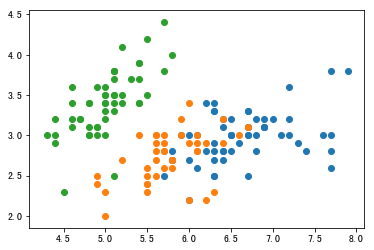

In [74]:
myresult = np.array(pred).reshape(150, 1)
plt.scatter(data[myresult[:, 0] == 1, 0], data[myresult[:, 0] == 1, 1])
plt.scatter(data[myresult[:, 0] == 2, 0], data[myresult[:, 0] == 2, 1])
plt.scatter(data[myresult[:, 0] == 0, 0], data[myresult[:, 0] == 0, 1])

In [101]:
d = np.load("nd_multi.npy")

In [102]:
d.shape

(150, 4)

In [104]:
for line in d[:10]:
    print(line)

[5.00615318 3.42812607 1.46205702 0.24599369]
[5.00542272 3.42721955 1.46197038 0.24591757]
[5.0053016  3.42730231 1.4619111  0.24591025]
[5.00515893 3.42713611 1.46196028 0.24590571]
[5.0061043  3.4281813  1.46205125 0.24599332]
[5.00681574 3.42888183 1.46222795 0.24610428]
[5.005404   3.42753305 1.46196259 0.24594665]
[5.00592446 3.42787541 1.46207581 0.2459779 ]
[5.00492127 3.42689771 1.46187448 0.24588547]
[5.00550165 3.42733456 1.46201508 0.24591533]


In [108]:
rest = np.concatenate([data, np.arange(150).reshape((150, 1))], axis=1)

In [110]:
for line in rest[:10]:
    temp =line
    print(line)

[5.1 3.5 1.4 0.2 0. ]
[4.9 3.  1.4 0.2 1. ]
[4.7 3.2 1.3 0.2 2. ]
[4.6 3.1 1.5 0.2 3. ]
[5.  3.6 1.4 0.2 4. ]
[5.4 3.9 1.7 0.4 5. ]
[4.6 3.4 1.4 0.3 6. ]
[5.  3.4 1.5 0.2 7. ]
[4.4 2.9 1.4 0.2 8. ]
[4.9 3.1 1.5 0.1 9. ]


In [111]:
temp

array([4.9, 3.1, 1.5, 0.1, 9. ])

In [112]:
temp[0:-1]

array([4.9, 3.1, 1.5, 0.1])

In [134]:
d = np.load("nd_multi_test.npy")

In [135]:
for line in d[:2]:
    print(line)

[array([[5.00606811, 3.4280561 , 1.46202539, 0.24599719]]) 0.0]
[array([[5.00574321, 3.42765291, 1.46198684, 0.24596336]]) 1.0]


In [136]:
line[0]

array([[5.00574321, 3.42765291, 1.46198684, 0.24596336]])

In [150]:
from sklearn.cluster import KMeans, MeanShift
import time

In [151]:
d1 = np.random.randn(10000, 4)
# d2 = np.random.randn(10000, 4) + 1
# d3 = np.random.randn(10000, 4) + 2
# d4 = np.random.randn(10000, 4) + 3

In [152]:
for i in range(1, 6):
    d1 = np.concatenate([d1, np.random.randn(10000, 4) + 1] ,axis=0)

In [153]:
d1.shape

(60000, 4)

In [158]:
start = time.time()
km = KMeans(n_clusters=6).fit(d1)
print(time.time() - start)

3.231421947479248


In [155]:
km.cluster_centers_

array([[ 1.83747987,  1.52883155,  1.76230754,  1.44350183],
       [-0.21650014, -0.14521944, -0.17778066, -0.10449829],
       [ 1.77898863,  0.61120766,  0.60088384,  0.06048537],
       [ 0.61398423, -0.05035244,  1.49157418,  1.46709837],
       [ 0.86668975,  1.36059609, -0.04207788,  1.70197564],
       [ 0.12732417,  1.66546694,  1.39373827,  0.35831133]])

In [156]:
start = time.time()
ms = MeanShift(bandwidth=6).fit(d1)
print(time.time() - start)

352.57127714157104


In [162]:
start = time.time()
km = KMeans(n_clusters=50).fit(d1)
data = km.cluster_centers_
ms = MeanShift(bandwidth=6).fit(data)
print(time.time() - start)

54.497668981552124


In [159]:
ms.cluster_centers_

array([[0.78795077, 0.77634418, 0.7803628 , 0.7782336 ]])

In [193]:
MeanShift().fit(data).cluster_centers_

array([[6.21142857, 2.89285714, 4.85285714, 1.67285714],
       [5.01632653, 3.45102041, 1.46530612, 0.24489796]])

In [192]:
data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])